In [22]:
import rasterio
from rasterio.plot import show

# Fire History Analysis
- Provided by Kyle, taken from https://data-nifc.opendata.arcgis.com/
- Cropped from bigger dataset, we are only looking at WA fire history

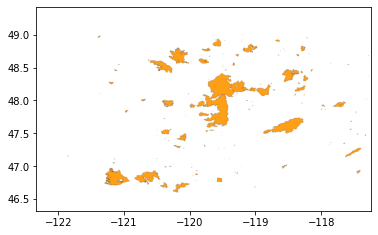

<AxesSubplot:>

In [23]:
path = r'data/wa fire hist/wa_fire_history.tif'
fire_hist = rasterio.open(path)
show(fire_hist)

# Notes on tif file
- X axis is longitude, Y axis is latitude
- Orange shapes represent bounds of areas affected by fires

In [24]:
# Gives number of bands
print('band count:', fire_hist.count)

band count: 4


- The band count indicates the number of layers in the image, in this case, we have 4

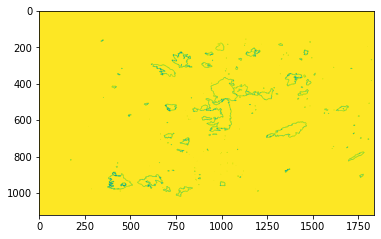

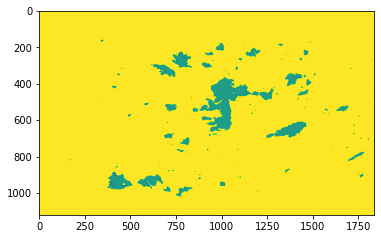

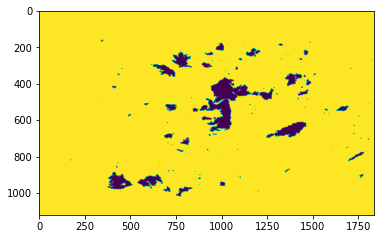

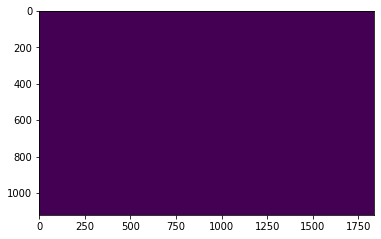

In [25]:
for band in range(fire_hist.count + 1)[1:]:
    show(fire_hist.read(band))

- Interesting that the lat/long labels to not carry to individual layers
- Not sure what each of these layers represents atm. Going to require further investigation
    - Also worth noting that with the exception of the final layer, all of the 'fire shapes' are in identical locations, and the final layer has no disctinct shapes, just a solid color
- I suspect that the primary usefulness of this map will be in identifying locations of areas affected by fires, so the collected layers (displayed at the top) should be the primary resource extracted

In [26]:
print('height:', fire_hist.height)
print('width:', fire_hist.width)

height: 1120
width: 1838


In [27]:
# This should provide a coordinate reference system. More investigation is required here
print('coordinate reference system:\n', fire_hist.crs)

coordinate reference system:
 EPSG:4326


In [28]:
print('Bounds:',fire_hist.bounds)

Bounds: BoundingBox(left=-122.332011924, bottom=46.32112768695701, right=-117.238124964, top=49.42512844604298)


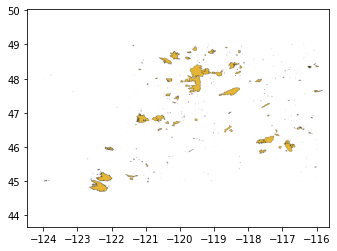

<AxesSubplot:>

In [29]:
path2 = r'data/wa fire hist/wa_fire_history_wildland_full_history.tif'
fire_hist2 = rasterio.open(path2)
show(fire_hist2)

In [30]:
fire_hist2.bounds

BoundingBox(left=-124.48083558202529, bottom=43.662043536, right=-115.6280114019747, top=50.024840459)

- Bounds here denotes the lat/long limits; which are the lat/long bounds wa state for this file

# What does an area affected by a forest fire mean for reforestation?
- Natural reforestation is a possiblity (aka natural regeneration)
    - Effectiveness of natural regeneration depends on abundance of seeds available from surviving plant species as well as the seeds that remained in the soil post-fire
        - NOTE: Effectiveness of natural regeneration might be something we should ignore, data on available seeds/surviving species would be hard/impossible to collect given our current capablities. Focus should remain on non-natural reforestation efforts (aka artifical regeneration)
- Planning Artifical Regeneration
    - Match the species to the site
        - Consider:
            - Soil Type
            - Slope Aspects
            - Frost Pockets (??? Look into this more)
            - Past management records
                - To see what species performed well and what did not (POTENTIAL FOR CLASSIFICATION DATA)
            - Planting a mix of conifers + shrubs + forbs(???) + grasses for undercover
            - "Trees that are grown from seed gathered at sites with similar conditions to yours will do better. The most commonly used criteria for matching seed zones in the Inland Northwest is elevation, and reputable nurseries should be able to tell you at what elevation their seed was collected for each species."
                -https://surviving-wildfire.extension.org/reforesting-your-forestland-after-a-wildfire/
            - Quantity: How many trees will be required
                -